<img src = 'credit_cards.jpg' width = 100%></img>

<h1 style = 'font-size: 35px; color: tomato; margin-bottom: 0px; margin-top: 20px'><b>Credit Card Fraud Detection & Analysis</b></h1>
<h5 style = 'color: gray; margin-top: 7px; margin-bottom: 25px'><b>With Composite Cluster-based Sampling & Optimistic Weighted Machine Learning</b></h5>

By: Ahmad Abu Saiid
<br>
Date: March 2021

---
#### <b>Introduction</b>
The dataset for this project contains transaction records by cardholders in europe from the year of 2013. It is a very imbalanced dataset, and therefore only has a small fraction of fraudelent transactions from the total records. All features are numerical (apart from the target label). Furthermore, most of the features have undergone a PCA transformation (for privacy reasons) which has resulted in V1...V28 features representing them. The only 3 additional features in the dataset (without PCA) is 'Time' for when the transaction occurred in seconds after the first transaction recorded, 'Amount' which is the transaction amount, and 'Class' as our target label indicating 0 for normal transaction and 1 for a fraudulent transaction. The total no. of features is 31, with 284,807 records.

#### <b>Agenda</b>
- The main agenda for this project is to detect fraud transactions effectively. This will be done by tackling the imbalanced issue with the dataset and taking proper measures to prepare it well for the machine learning models, so that it does not overfit and is effective in differentiating between normal and fraudulent transactions. This is how it would be in a real-case scenario for companies while trying to detect fraud, as in most cases the amount of fraud transactions are small compared to the total transactions and poses a challenge for us to overcome this issue.

- A second agenda that I had was to come up with valuable insights and identify potential relationships/trends of how fraudulent transactions occur, but due to majority of the features having undergone through PCA already, thus having no background info about them, it results in a very limited chance to extract many insights.

#### <b>Acknowledgements</b>
Dataset taken from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Thanks to Machine Learning Group - ULB (Université Libre de Bruxelles)

<h4 style = 'margin-bottom: 20px'><b>Sections </b><span style = 'font-weight: normal; font-size: 12px'><i>(Click to jump)</i></span></h4> 
<a href = '#section1'><h5 style = 'color: black; margin-bottom: 12px'>1. Data Load & Exploration</h5></a>
<a href = '#section2'><h5 style = 'color: crimson; margin-bottom: 12px'>2. Data Cleaning & Engineering</h5></a>
<a href = '#section3'><h5 style = 'color: teal; margin-bottom: 12px'>3. Exploratory Data Analysis (EDA) & Data Transformation</h5></a>
<a href = '#section4'><h5 style = 'color: purple; margin-bottom: 12px'>4. Stratified Train-Test Split & Scaling</h5></a>
<a href = '#section5'><h5 style = 'color: #000075; margin-bottom: 12px'>5. Composite Cluster-based Undersampling & Oversampling</h5></a>
<a href = '#section6'><h5 style = 'color: brown; margin-bottom: 12px'>6. Feature Importance, Selection & Cleaning</h5></a>
<a href = '#section7'><h5 style = 'color: DodgerBlue; margin-bottom: 12px'>7. Optimistic Weighted Machine Learning (OW-ML) & Hyperparameter Tuning</h5></a>
<a href = '#section8'><h5 style = 'color: MediumSeaGreen; margin-bottom: 12px'>8. Classification Model Evaluations</h5></a>
<a href = '#section9'><h5 style = 'color: slateblue; margin-bottom: 12px'>9. Final Thoughts & Summary</h5></a>

<br>

##### <i>Flow and explanations are done throughout the code. Enjoy! :)</i>
---

<a id = 'section1'></a>

<h1 style = 'font-size: 25px; color: black'>1. Data Load & Exploration</h1>

In [1]:
# initial load of library packages and more will be loaded through out the notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make the graphs appear in the notebook, and also setup template for seaborn/matplotlib
%matplotlib inline
sns.set(rc = {'figure.figsize': (12, 7)}, palette = 'Set2')
plt.style.use("fivethirtyeight")

# rand value for seeding purposes
rand_val = 654

In [2]:
# load dataset and have a quick view
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# inspect the shape of our dataframe
df.shape

(284807, 31)

In [4]:
# inspect the class proportion for fraud & non-fraud
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# identify the percentage of fraud
fraud_percentage = (df['Class'].value_counts()[1] / (df.shape[0])) * 100
print('Fraud Percentage: %.2f %%' % fraud_percentage)

Fraud Percentage: 0.17 %


> We can see that the fraction of fraudulent transactions is only 0.17% which means the remaining 99.83% of transaction records are normal. We gotta deal with this!

In [6]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# convert the 'Time' field to integer data type
df['Time'] = df['Time'].astype('int64')

In [8]:
# check on summary for the numeric fields
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


- Noticed some of the PCA features having outliers. 
- 'Amount' feature is having very extreme outliers from the max side. Need to deal with this later.
- No invalid values spotted for now.
- Most of the PCA features have a mean that is very close to zero which is expected as they must have been scaled while undergoing PCA.

In [9]:
# check for null values
df.isna().sum().max()

0

> No NULL values in the whole dataset which is good news, as imputation would not be needed in this case.

In [10]:
# check for duplicate records
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

> The dataset has some duplicate records, and this must be dealt with.

In [11]:
df[df.duplicated()].Class.value_counts()

0    1062
1      19
Name: Class, dtype: int64

> Duplicate records found for both normal and fraud transactions.

<b>Note:</b>
<br>
Given that there is no information given regarding these duplicated records, we can't just remove them instantly as the duplicate records could also refer to people doing the same transactions multiple times and this could have potential useful meaning to it. My solution is to add a new feature called 'Trans_Count' that will state how many of the same transactions have occurred for each record. Then I delete those duplicate records as its pointless to keep them. In this way, I have dealt with the duplicate records and at the same time kept some info about them in a new feature. If that new feature does not have any useful impact, then it can always be removed later on.

<a id = 'section2'></a>

<h1 style = 'font-size: 25px; color: crimson'>2. Data Cleaning & Engineering</h1>

> Not too much cleaning to do as there are no NULL values, or other major issues.

In [12]:
# add new feature 'Trans_Count for identifying multiple transactions of the same exact kind'
df['Trans_Count'] = df.groupby(df.columns.tolist())['Time'].transform('count')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Trans_Count
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


In [13]:
# drop the duplicate transaction records and reset the index
df.drop(df.index[df.duplicated()].tolist(), inplace = True)
df.reset_index(drop = True, inplace = True)

In [14]:
# final check for duplicate records
df.duplicated().value_counts()

False    283726
dtype: int64

In [15]:
df.shape

(283726, 32)

In [16]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<b>Note:</b>
<br>
I noticed that the 'Time' feature does not really provide anything useful in my opinion as it just gives the amount of seconds that has passed for that transaction from the first transaction recorded. This would not really help the machine learning model as its something similar to index which is pointless for the model. Instead we could use this feature to engineer a new one called 'Prev_Fraud_Seconds'. This new feature would use 'Time' and 'Class' to provide how many seconds has actually passed between the most recent fraud transaction and the current transaction. This could potentially have better meanining to our analysis. After the new feature is added, the 'Time' feature can be dropped as I see no point of it.

In [17]:
# add new feature to identify how much time (seconds) have passed since the last fraud
total_time = 0
prev_time = 0
df['Prev_Fraud_Seconds'] = 0

for index, row in df.iterrows():
    df.at[index,'Prev_Fraud_Seconds'] = total_time + (row['Time'] - prev_time)
    prev_time = row['Time']
    
    if row['Class'] == 0:
        total_time = df.at[index,'Prev_Fraud_Seconds']
    else:
        total_time = 0


In [18]:
# drop the 'Time' feature as it's not needed anymore
df.drop(columns = 'Time', axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Trans_Count,Prev_Fraud_Seconds
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,2


In [19]:
# re-order the columns to make it more organized
df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Trans_Count', 'Prev_Fraud_Seconds', 'Class']]

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Trans_Count,Prev_Fraud_Seconds,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,1,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,1,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,2,0


<a id = 'section3'></a>

<h1 style = 'font-size: 25px; color: teal'>3. Exploratory Data Analysis (EDA) & Data Transformation</h1>

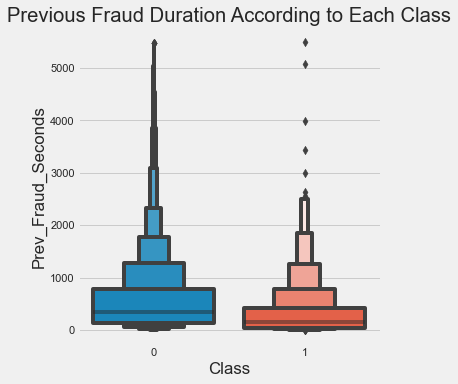

In [20]:
# inspect relationship between the target class label and how much seconds usually pass by after the last fraud transaction
sns.catplot(x = 'Class', y = 'Prev_Fraud_Seconds', data = df, kind = 'boxen').set(title = 'Previous Fraud Duration According to Each Class')
plt.show()

<b>Do the fraudulent transactions tend to occur quite closely one after the other, or do they have huge time gaps between them?</b>
<br>
From the above boxen chart and percentiles, we can see that most of the fraudulent transactions tend to occur within 1000 seconds (around 16mins) or less after the previous fraud transaction. This indicates that most perpetrators tend to not leave huge time gaps between transactions if they are carrying out multiple fraudulent transactions.

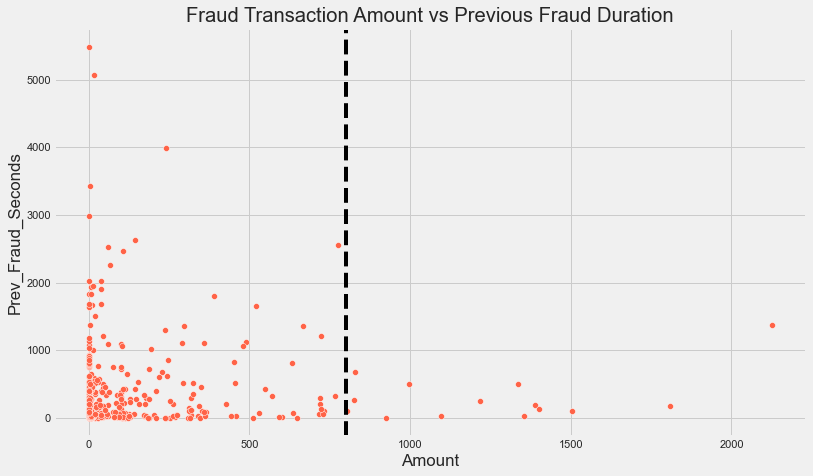

In [21]:
# inspect relationship between transaction amount and seconds passed by after the latest fraud transaction
# filter to only display the fraud transactions which is what the focus is on
sns.scatterplot(x = 'Amount', y = 'Prev_Fraud_Seconds', data = df.loc[df.Class == 1], color = 'tomato').set(title = 'Fraud Transaction Amount vs Previous Fraud Duration')
plt.axvline(x = 800, color = 'black', linestyle = '--')
plt.show()

<b>Since alot of fraud transactions occur quite quickly one after the other, does it have any relationship with the amount of money credited?</b>
<br>
The scatter graph allows us to notice that although the max amount from a single fraud transactions is around 2k (very rare), more than 90% of fraud transactions are credited with an amount that is less than 800. Apart from that, there is no strong linear relationship between these two features.

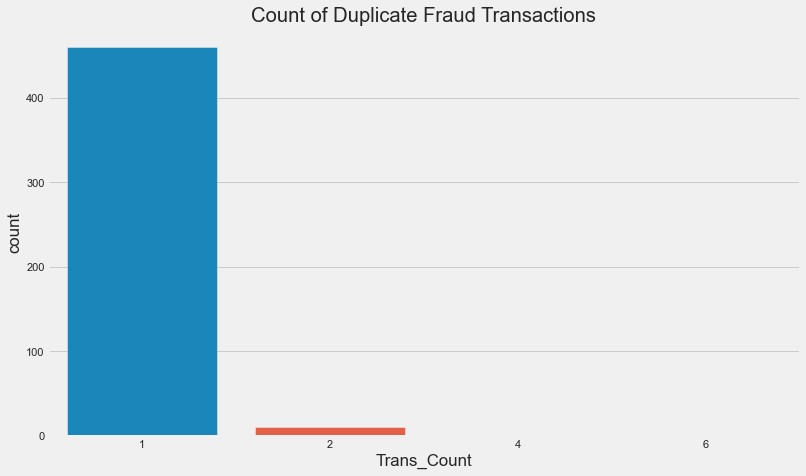

In [22]:
# explore whether if, and how many duplicate transactions there are for fraudulent transactions.
sns.countplot(x= 'Trans_Count', data = df.loc[df.Class == 1]).set(title = 'Count of Duplicate Fraud Transactions')
plt.show()

<b>Do perpetrators tend to do multiple transaction of the same kind? <i>(With the assumption that the duplicate records referred to multiple identical transactions)</i></b>
<br>
Nope, most of the fraud transactions are distinct with only a tiny amount of them having duplicate transactions.

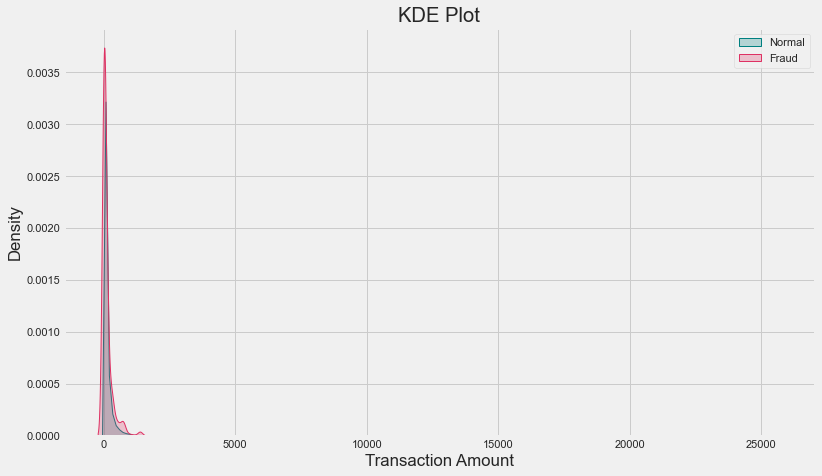

In [23]:
# inspect the distribution for transaction amounts for both normal and fraud

norm_amount = df.loc[df.Class == 0]['Amount'].values.tolist()
fraud_amount = df.loc[df.Class == 1]['Amount'].values.tolist()

sns.kdeplot(norm_amount, fill = True, linewidth = 1, color = 'teal')
sns.kdeplot(fraud_amount, fill = True, linewidth = 1, color = '#DE3163')
plt.xlabel('Transaction Amount')
plt.legend(['Normal', 'Fraud'])
plt.title('KDE Plot')

plt.show()

> The transaction amount is skewed to the right as it has a number of extreme outliers. We can see that most transactions have a very small amount (less than 2k), while the max outlier is at around 25k.

In [24]:
# inspect the outliers further
# inspect median instead of mean, as data is skewed

print('Average (median) Transaction Amount: ',df.Amount.median())
q1, q3 = df['Amount'].quantile([0.25, 0.75])
iqr = q3 - q1
print('Positive Outliers start from: ', (q3 + 1.5*iqr))



Average (median) Transaction Amount:  22.0
Positive Outliers start from:  185.375


> Since we have a number of outliers, I have decided to remove transaction amounts that have 'extreme' outliers, therefore above 5k. I don't want to remove all the outliers as they are still considered as acceptable transactions but just rare ones.

In [25]:
# drop rows that have transaction amount more than 5k
df = df.loc[df.Amount <= 5000].reset_index(drop = True)

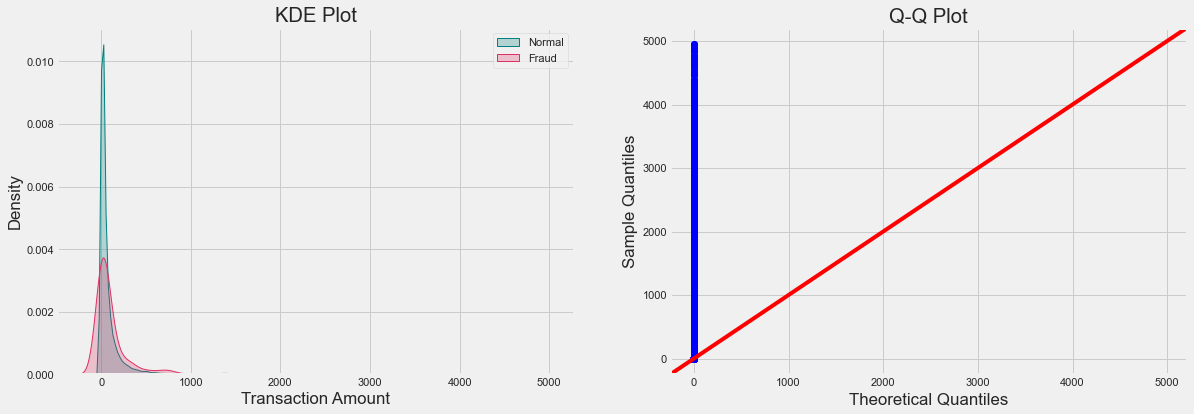

In [26]:
# inscpect the distribution of transaction amount and how close it is to the gaussian distribution through a q-q plot

from statsmodels.api import qqplot

norm_amount = df.loc[df.Class == 0]['Amount'].values.tolist()
fraud_amount = df.loc[df.Class == 1]['Amount'].values.tolist()

fig, ax = plt.subplots(1, 2, figsize = (18, 7), squeeze = True)
fig.tight_layout(pad = 5)

sns.kdeplot(norm_amount, fill = True, linewidth = 1, color = 'teal', ax = ax[0])
sns.kdeplot(fraud_amount, fill = True, linewidth = 1, color = '#DE3163', ax = ax[0])
ax[0].set(xlabel = 'Transaction Amount', title = "KDE Plot")
ax[0].legend(['Normal', 'Fraud'])


qqplot(df['Amount'], line = '45', ax = ax[1])
ax[1].set(title = "Q-Q Plot")

plt.show()

> Distibution is still heavily skewed to the right, and to fix this, I will be transforming the data for this feature.

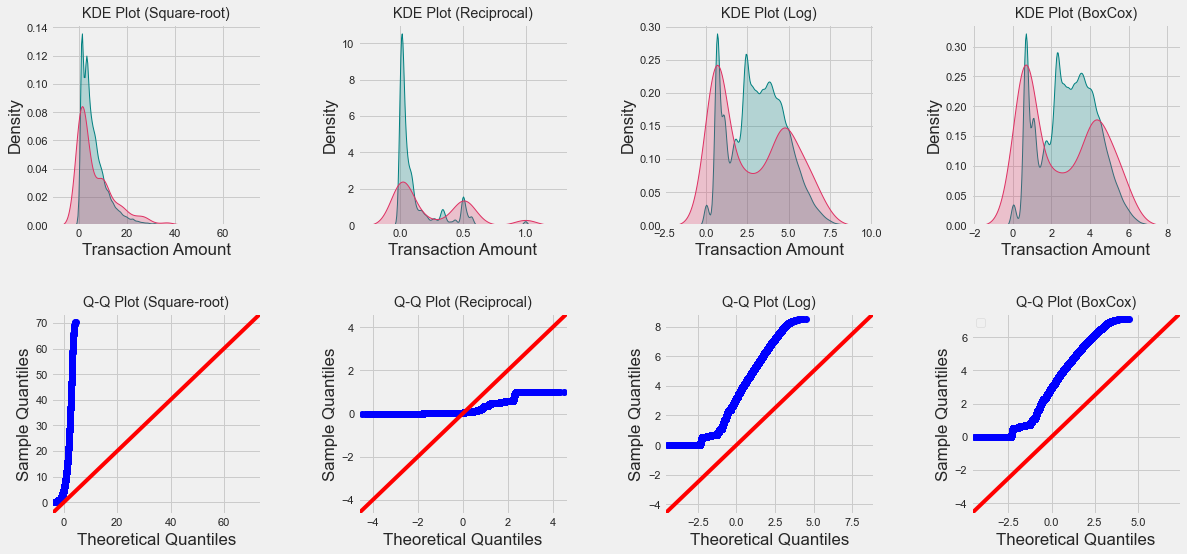

In [27]:
# compare four different transformations (square-root, reciprocal, log and boxcox) for dealing with the skewed data

from scipy.stats import boxcox

fig, ax = plt.subplots(2, 4, figsize = (18, 9), squeeze = True)
fig.tight_layout(pad = 5)
plt.rcParams['font.size'] = '10'

# square-root transformation
sns.kdeplot(np.sqrt(norm_amount), fill = True, linewidth = 1, color = 'teal', ax = ax[0][0])
sns.kdeplot(np.sqrt(fraud_amount), fill = True, linewidth = 1, color = '#DE3163', ax = ax[0][0])
ax[0][0].set(xlabel = 'Transaction Amount', title = 'KDE Plot (Square-root)')
plt.legend(['Normal', 'Fraud'])
qqplot(np.sqrt(df['Amount']), line = '45', ax = ax[1][0])
ax[1][0].set(title = 'Q-Q Plot (Square-root)')

# reciprocal transformation
sns.kdeplot((1 / (np.array(norm_amount) + 1)), fill = True, linewidth = 1, color = 'teal', ax = ax[0][1])
sns.kdeplot((1 / (np.array(fraud_amount) + 1)), fill = True, linewidth = 1, color = '#DE3163', ax = ax[0][1])
ax[0][1].set(xlabel = 'Transaction Amount', title = 'KDE Plot (Reciprocal)')
plt.legend(['Normal', 'Fraud'])
qqplot((1 / (df['Amount'] + 1)), line = '45', ax = ax[1][1])
ax[1][1].set(title = 'Q-Q Plot (Reciprocal)')

# log transformation
sns.kdeplot(np.log(np.array(norm_amount) + 1), fill = True, linewidth = 1, color = 'teal', ax = ax[0][2])
sns.kdeplot(np.log(np.array(fraud_amount) + 1), fill = True, linewidth = 1, color = '#DE3163', ax = ax[0][2])
ax[0][2].set(xlabel = 'Transaction Amount', title = 'KDE Plot (Log)')
plt.legend(['Normal', 'Fraud'])
qqplot(np.log(df['Amount']+1), line = '45', ax = ax[1][2])
ax[1][2].set(title = 'Q-Q Plot (Log)')

# boxcox transformation
df2 = df.copy()
df2['Amount'], bc_lambda = boxcox((df['Amount'] + 1).values)
norm_amount_bc = df2.loc[df.Class == 0]['Amount'].values
fraud_amount_bc = df2.loc[df.Class == 1]['Amount'].values
sns.kdeplot(norm_amount_bc, fill = True, linewidth = 1, color = 'teal', ax = ax[0][3])
sns.kdeplot(fraud_amount_bc, fill = True, linewidth = 1, color = '#DE3163', ax = ax[0][3])
ax[0][3].set(xlabel = 'Transaction Amount', title = 'KDE Plot (BoxCox)')
plt.legend(['Normal', 'Fraud'])
qqplot(df2['Amount'], line = '45', ax = ax[1][3])
ax[1][3].set(title = 'Q-Q Plot (BoxCox)', )


plt.show()

> From both the kde plot and q-q plot, we can see that the square-root and reciprocal transformations does poorly for dealing with this skewed data. On the other hand, the log and boxcox transformations does much better to deal with the skewed data but still not a perfect gaussian-like distribution. At first they both seem to have the same outcome, but actually if you look closer, the boxcox actually does a little bit better compared to the log transformation. Therefore, I will proceed with the boxcox transformation for this 'Amount' feature.

In [28]:
# transform the 'Amount' feature using boxcox
df['Amount'], bc_lambda = boxcox((df['Amount'] + 1).values)

print('\nTransaction Amount transformed by BoxCox using lambda = ', round(bc_lambda, 4))


Transaction Amount transformed by BoxCox using lambda =  -0.0434


In [29]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Trans_Count,Prev_Fraud_Seconds,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,4.506686,1,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.269332,1,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.235697,1,1,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.352839,1,1,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,3.891575,1,2,0


<br>
<b>Hypothesis Test for Significance</b>
<br>
I would like to investigate if most fraudsters tend to perform similar transaction amounts just like transactions done by normal people.
First step, is to decide whether to use a parametric test or a non-parametric test, depending on whether transaction amount has a gaussian (normal) distribution.
Since, just before this we dealt with this issue, as the data was majorly skewed, I used boxcox transformation, to solve/mitigate the issue, and from the above diagram it can be seen it became close to a normal distribution, but is NOT a perfect one. Therefore, I will further test for normality using skewness and kurtosis measurements.

In [30]:
import scipy.stats as st

# check skewness, kurtosis and apply the test for normality
amount_skewness = round(st.skew(df.Amount.values.tolist()), 3)
amount_kurtosis = round(st.kurtosis(df.Amount.values.tolist(), fisher = True), 3)
z_score, p_val = st.normaltest(df.Amount.values.tolist())

print('Skewness for Transaction Amount: ', amount_skewness)
print('Kurtosis for Transaction Amount: ', amount_kurtosis)
print('p-value for Normality Test in Transaction Amount: ', p_val)

Skewness for Transaction Amount:  0.018
Kurtosis for Transaction Amount:  -0.765
p-value for Normality Test in Transaction Amount:  0.0


<br>
For a normal distribution, skewness is expected to be very close to 0, while kurtosis is also expected to be very close to 0 (using Fisher's method).

> From the above results, it can be seen that skewness is indeed very close to 0, but kurtosis is at -0.7 which means it has light tails and is more of a platykurtic distribution.
<br>
> Lastly, a normality test is done, and we got a p-value of 0.0, hence we can reject the null hypothesis and assume that Transaction amounts do not follow a normal distribution.

As this is involving two samples (normal & fraud), with a numerical feature, the <b>'Mann Whitney U Test'</b> would be the perfect choice here as it is considered as the nonparametric equivalent of the 'Two Sample t-test'. Therefore, we will be focusing on the medians of the two groups rather than the mean.

##### <b><u>Mann Whitney U Test:</u></b>
<b>Is there a significant difference between normal and fraudulent transaction amounts?</b>

> H<sub>0</sub>: There is no significant difference between the median of normal and fraudulent transaction amounts

> H<sub>a</sub>: There is a significant difference between the medians of normal and fraudulent transaction amounts

> Significance Level, α = 0.05

In [31]:
# create a function to perform the mann whitney u test and return the u_stat and p-value
def mann_whitney_u_test(sample1, sample2):
    u_stat, p_val = st.mannwhitneyu(sample1, sample2)
    return u_stat, round(p_val, 5)

In [32]:
# only take 300 data points (randomly) from each class, to make it fair and also shuffle the data
normal = df.loc[df.Class == 0]['Amount'].sample(300, random_state = rand_val).sample(frac = 1, random_state = rand_val).values.tolist()
fraud = df.loc[df.Class == 1]['Amount'].sample(300, random_state = rand_val).sample(frac = 1, random_state = rand_val).values.tolist()

# implement the test
u_statistic, p_value = mann_whitney_u_test(normal, fraud)

print('U-statistic: ', u_statistic)
print('p-value    : ', p_value)

# decision on whether to accept or reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print('\nReject the NULL Hypothesis')
else:
    print('\nFAIL to Reject the NULL Hypothesis')    

U-statistic:  39452.0
p-value    :  0.00444

Reject the NULL Hypothesis


<b>From the above result, it can be concluded that there is a significant difference between normal and fraudulent transaction amounts (with a 95% confidence).</b>

<a id = 'section4'></a>

<h1 style = 'font-size: 25px; color: purple'>4. Stratified Train-Test Split & Scaling</h1>

Something to keep in mind here, is that before performing any scaling, undersampling or oversampling, I have decided to already keep aside a portion of the data for test set, to ensure that there is absolutely no bias or info passing between train and test set. This will help to keep our model evaluation fair.

In [33]:
# isolate 20% of data (in relation to the fraud amount), for both normal and fraud transactions as the test set.

print('\n20% of fraud transactions = ', round(0.2*df.Class.value_counts()[1]))

# split
test_portion = pd.concat([df.loc[df.Class == 0].sample(95, random_state = rand_val), df.loc[df.Class == 1].sample(95, random_state = rand_val)])
train_portion = df.loc[df.reset_index()['index'].isin(test_portion.reset_index()['index']) == False]

# shuffle
test_portion = test_portion.sample(frac = 1, random_state = rand_val).reset_index(drop = True)
train_portion = train_portion.sample(frac = 1, random_state = rand_val).reset_index(drop = True)


20% of fraud transactions =  95


> Due to imbalanced dataset, we can't just do the typical auto stratified train-test split and instead need to do it a little different. Therefore, instead of taking 20% of the whole dataset, we use the minority class to check for its 20%, and can see that it is 95 transactions. Then, the test set is created by taking 95 random transactions for each normal and fraud transactions (to make it stratified). Total is 190. Both the train and test set is then shuffled.

In [34]:
from sklearn.preprocessing import RobustScaler

# Choose the robust scaler (from the multiple scaling options that sklearn offers) as this one is less affected by outliers.
# Only need to scale 'Amount', 'Trans_Count' and 'Prev_Fraud_Seconds' as the other PCA features must have been scaled already.

rb_scaler = RobustScaler()

# seperate scaling for train and test set each
train_portion[['Amount', 'Trans_Count', 'Prev_Fraud_Seconds']] = rb_scaler.fit_transform(train_portion[['Amount', 'Trans_Count', 'Prev_Fraud_Seconds']].values)
test_portion[['Amount', 'Trans_Count', 'Prev_Fraud_Seconds']] = rb_scaler.fit_transform(test_portion[['Amount', 'Trans_Count', 'Prev_Fraud_Seconds']].values)

<a id = 'section5'></a>

<h1 style = 'font-size: 25px; color: #000075'>5. Composite Cluster-based Undersampling & Oversampling</h1>

The strategy here is to not use one of either undersampling or oversampling, but combine both together. The weakness of undersampling is that you risk losing valuable variation from the features if you lose alot of the data. While for oversampling, you risk having alot of similar points which could cause your model to overfit.

My approach is to first implement undersampling (for the normal transactions) but not just using the basic random-undersampling, and instead through clusters to ensure that we capture as much variability as possible. In addition to that, I do not undersample all the way to the same number of fraud transactions as that is too small. Instead, I randomly take 1500 transactions from each cluster to ensure a reasonable portion of info is maintained from each cluster. Next, the fraud transactions are synthetically oversampled using a variation of SMOTE (cluster-based smote) to match the amount of normal transactions. Note that since we already undersampled the normal transactions, the fraud transactions do not have to be oversampled to very large amounts, thus reducing the risk of overfitting.


In [35]:
from sklearn.decomposition import PCA

# implement PCA for dimensionality reduction as K-Means clustering tends to suffer with high dimensions
# filter only the normal transactions as this is for undersampling
# maintain 90% of the variability through PCA

norm_trans = train_portion.loc[train_portion.Class == 0].drop(columns = 'Class', axis = 1).copy()

pca = PCA(0.90, random_state = rand_val)
pca.fit(norm_trans)
print('\nNo. of components: ', pca.n_components_)
print(f'Total Proportion of Variance Explained = {round(np.sum(pca.explained_variance_ratio_), 3)}')

non_fraud = pca.transform(norm_trans)


No. of components:  20
Total Proportion of Variance Explained = 0.905


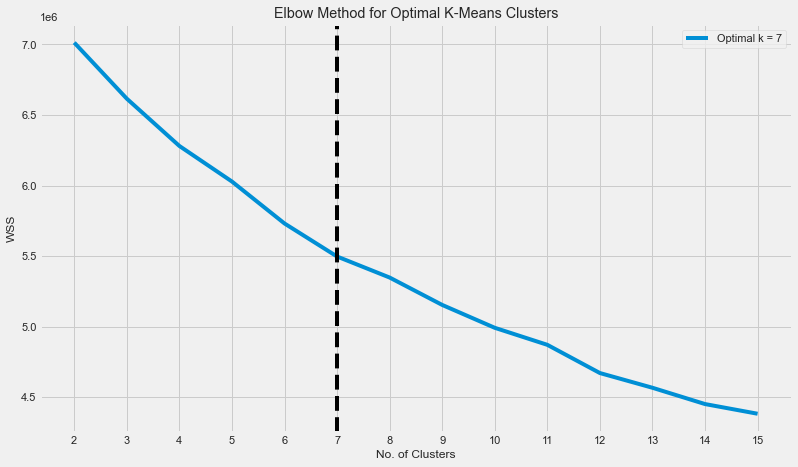

In [36]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# use the principal components to create the clusters
# apply the elbow method to check the 'Within Sum of Squared Distance' and identify the the optimal k clusters to use

wss = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, random_state = rand_val)
    kmeans.fit(non_fraud)
    wss.append(kmeans.inertia_)
    
kl = KneeLocator(range(2, 16), wss, curve = 'convex', direction = 'decreasing')
elbow = kl.elbow

plt.figure(figsize = (12, 7))
plt.plot(range(2, 16), wss, label = f'Optimal k = {elbow}')
plt.xticks(range(2, 16))
plt.axvline(x = elbow, color = 'black', linestyle = '--')
plt.title('Elbow Method for Optimal K-Means Clusters')
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.legend()
plt.show()

> Can see that the optimal no. of clusters would be 7. 

> Normally I would have liked to also add the silhoutte method to confirm the optimal k, but given that the data has close to 300k records, the computation time is high for silhoutte and therefore I decided to leave it out.

In [37]:
# Use the optimal k for applying k-means clustering to the data and have a new column with the assigned clusters

kmeans_model = KMeans(n_clusters = elbow, random_state = rand_val)
norm_trans['Cluster'] = kmeans_model.fit_predict(non_fraud)

norm_trans.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Trans_Count,Prev_Fraud_Seconds,Cluster
0,-4.201077,-6.001942,0.439255,-0.840717,-0.101465,-2.031610,-1.451376,0.630241,-1.962773,0.364170,...,1.206365,0.338454,-0.741170,-0.429884,0.011213,-0.492187,1.149018,0.0,-0.307099,1
1,1.152835,-1.498304,-0.714552,1.497775,-0.811127,0.177353,-0.070987,0.101160,0.790272,0.165321,...,-0.015162,-0.476662,-0.556724,-0.972735,-0.024427,0.028703,1.088416,0.0,-0.442901,5
2,1.253237,-0.056468,0.384265,0.785219,-0.450395,-0.334058,-0.172642,-0.042341,0.733990,-0.198121,...,-0.146844,-0.067997,0.632620,0.470809,-0.020658,0.005192,-0.302745,0.0,0.069444,5
3,1.252935,-1.320102,-0.084494,-1.466135,-1.013933,0.047385,-0.824140,0.097227,-2.207372,1.539836,...,-0.042991,-0.306627,0.322390,-0.109455,0.017004,0.007836,0.567200,0.0,-0.077160,2
4,1.888397,-0.743136,-0.368860,0.276728,-0.985827,-0.572758,-0.666346,0.013924,1.710615,-0.204449,...,0.104215,-0.072278,-0.238009,0.131430,0.001169,-0.036843,0.385432,0.0,0.098765,5


In [38]:
# check how many records in each cluster
norm_trans.Cluster.value_counts().sort_values(ascending = False)

4    106404
5     89813
2     41841
0     18264
6     17155
3      5962
1      3664
Name: Cluster, dtype: int64

In [39]:
# stratified sampling by randomly takinng 1500 points from each cluster

norm_trans = norm_trans.groupby('Cluster').sample(n = 1500, random_state = rand_val)
norm_trans.shape

(10500, 32)

In [40]:
# drop the cluster column, as we don't need it anymore

norm_trans.drop(columns = 'Cluster', inplace = True)
norm_trans['Class'] = 0
norm_trans.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Trans_Count,Prev_Fraud_Seconds,Class
198664,-0.112190,1.603163,-0.671477,1.023396,1.132893,-0.097822,0.889352,-0.042056,0.072479,-0.684578,...,-0.453721,0.140943,0.420318,0.341465,0.001752,0.071328,-0.322963,0.0,-0.208333,0
42855,1.138817,0.334317,0.569572,1.350197,-0.291562,-0.808329,0.127525,-0.317435,1.235423,-0.416538,...,-0.060740,0.333390,0.523238,-0.484880,-0.009658,0.029466,0.352506,0.0,-0.395062,0
192248,1.151699,-0.064179,0.804768,0.039920,-0.595815,-0.301666,-0.455772,0.022704,1.407487,-0.465671,...,0.135701,0.212783,-0.043979,0.864249,-0.088057,-0.005633,-0.040699,0.0,2.336420,0
58972,0.169346,1.207332,-0.331179,-0.397211,1.162960,-0.655055,0.923399,-0.221310,1.135737,-1.225248,...,0.066155,0.330250,-0.390444,0.084304,0.201209,0.077274,-1.066101,0.0,-0.114198,0
225282,1.927688,-1.140719,0.777602,-0.411221,-1.737453,0.183016,-1.654361,0.184415,4.649651,-1.466834,...,0.142890,0.036993,-0.280945,0.270649,0.057519,-0.040414,-0.265488,0.0,5.135802,0


In [41]:
# update the train set with the undersampled normal transactions + fraud transactions

train_set = pd.concat([norm_trans, train_portion.loc[train_portion.Class == 1]]).sample(frac = 1, random_state = rand_val).reset_index(drop = True)
train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Trans_Count,Prev_Fraud_Seconds,Class
0,-2.014038,0.100916,-0.313110,-0.922416,3.739606,2.849560,-0.713639,-0.395765,0.340864,0.653019,...,-0.599177,1.005245,-0.231556,-0.881303,-0.505153,-0.225657,-0.303125,0.0,0.722222,0
1,-0.356439,-0.586542,1.648931,-2.521467,-0.301647,-0.840528,-0.090520,-0.320963,-2.198654,0.973358,...,-0.207253,-0.182098,0.065786,-0.354840,-0.077887,-0.117767,-0.302745,0.0,1.236111,0
2,0.424393,-1.744141,-0.072680,1.082240,-1.143307,0.001067,0.190040,-0.105065,-0.702452,0.500717,...,-0.359686,0.041237,0.365867,-0.355095,-0.022015,0.095783,1.126876,0.0,-0.487654,0
3,1.801657,-0.309253,0.045847,1.497989,-0.927750,0.023711,-1.130187,0.361034,1.264645,-0.179887,...,0.177349,-0.134993,-0.407306,-0.604522,0.100151,0.002176,0.067205,0.0,-0.126543,0
4,-2.599048,2.770795,-2.834379,-0.721882,-0.597031,-0.536532,-0.896461,2.227201,-0.414725,-0.583432,...,0.276955,0.115427,-0.096279,0.146904,0.030416,-0.026128,-0.077705,0.0,-0.199074,0


In [42]:
# check value counts for each class in train set
train_set.Class.value_counts()

0    10500
1      378
Name: Class, dtype: int64

> The normal transactions have been reduced from 200k+ to 10.5k. Next step is to oversample the fraud transactions to 10.5k in order to make them balanced.

In [43]:
# assign the independent variables to X, and target label (dependent variable) to y

X_train = train_set.iloc[:,:-1].values
y_train = train_set.iloc[:,-1:].values

In [44]:
from imblearn.over_sampling import KMeansSMOTE

# use KMeansSMOTE which is a cluter-based SMOTE for synthetic over-sampling

km_smote = KMeansSMOTE(k_neighbors = 3, random_state = rand_val)


X_train, y_train = km_smote.fit_resample(X_train, y_train.ravel())

print('Shape of oversampled X_train: ', X_train.shape)
print('Shape of oversampled y_train: ', y_train.shape)

print('\nCount of normal transactions after oversampling: ', sum(y_train == 0))
print('Count of fraud transactions after oversampling: ', sum(y_train == 1))


Shape of oversampled X_train:  (21000, 31)
Shape of oversampled y_train:  (21000,)

Count of normal transactions after oversampling:  10500
Count of fraud transactions after oversampling:  10500


> Training set is now balanced with both classes having 10.5k points each

<a id = 'section6'></a>

<h1 style = 'font-size: 25px; color: brown'>6. Feature Importance, Selection & Cleaning</h1>

In [45]:
# Make a dataframe from the train set for easily identifying correlations
train_df = pd.DataFrame(X_train, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                                'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Trans_Count', 'Prev_Fraud_Seconds'])

train_df['Class'] = y_train

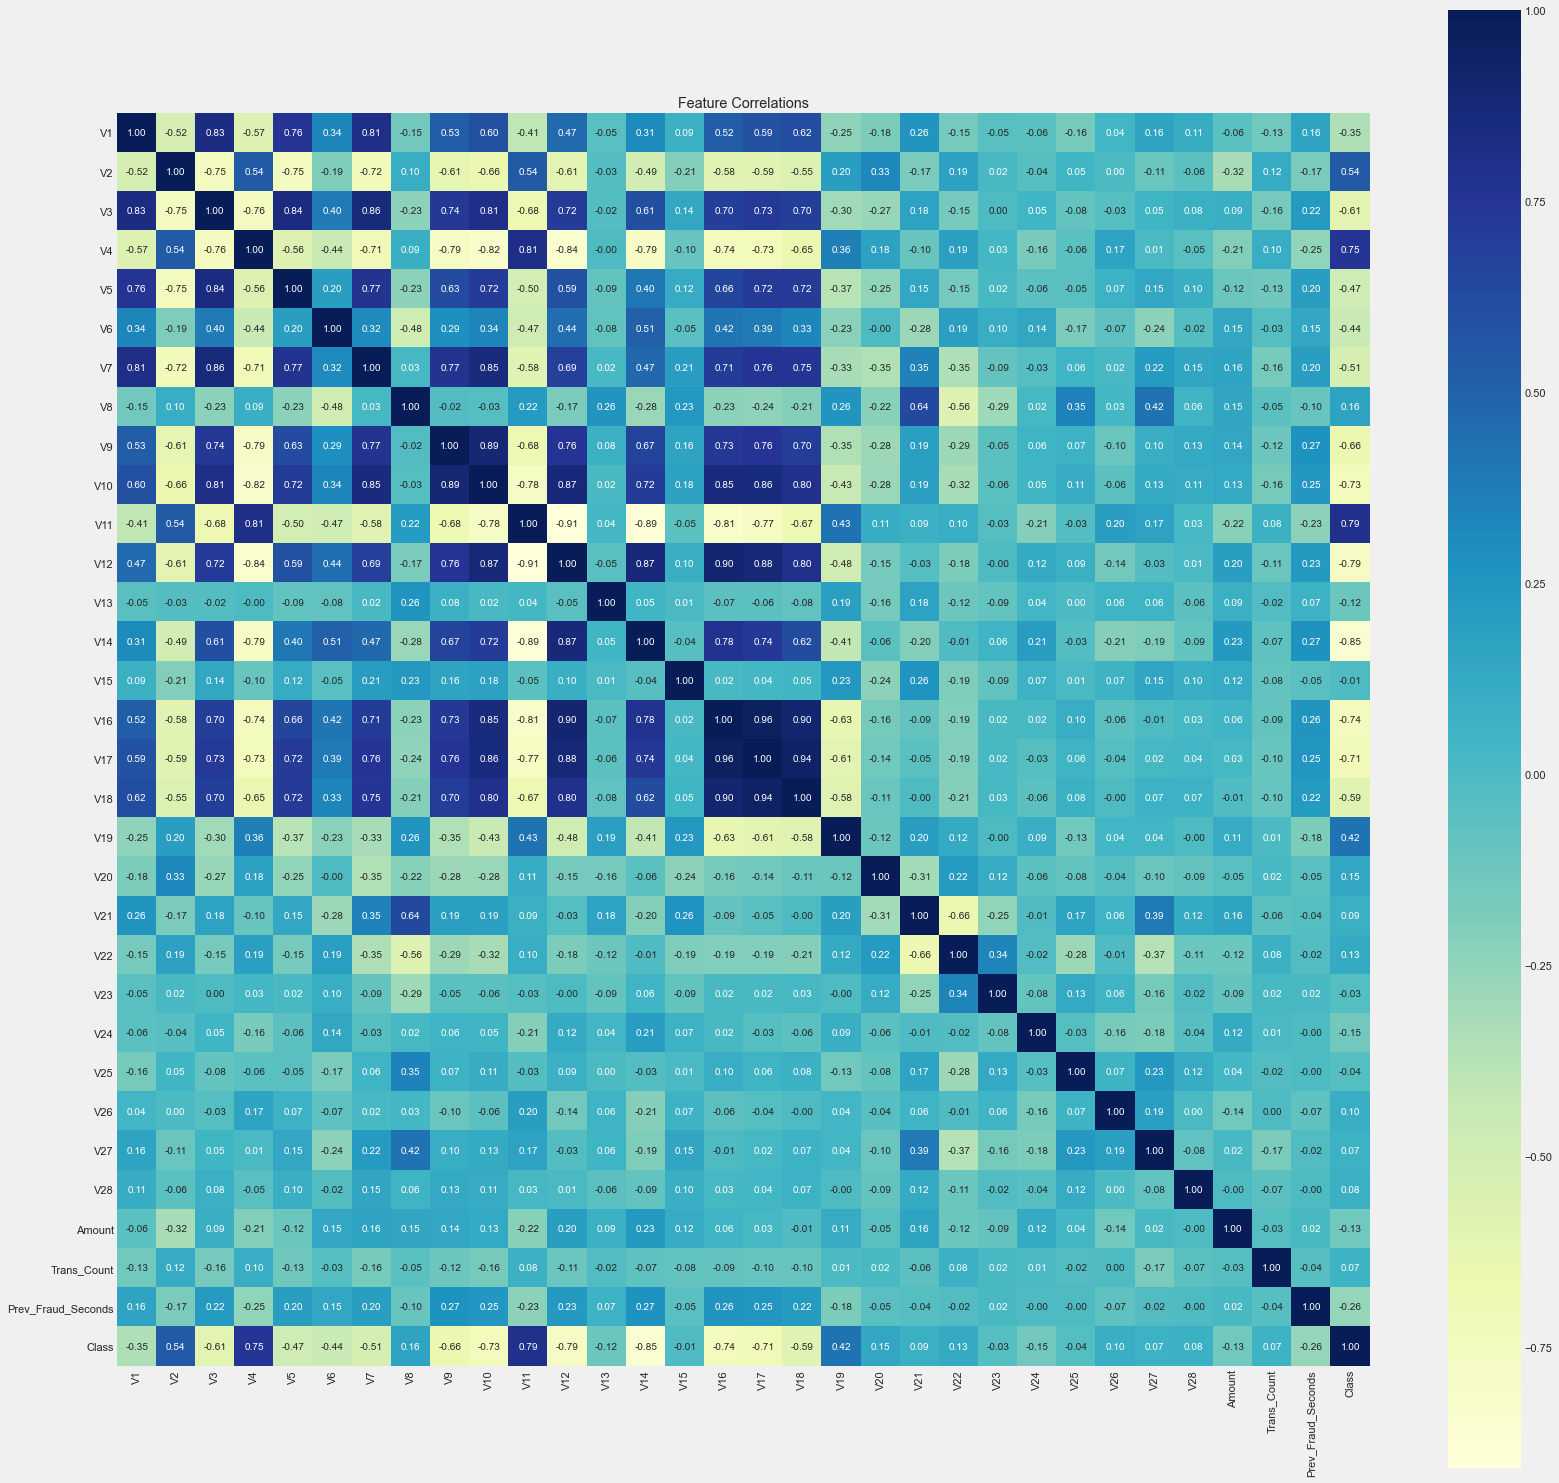

In [46]:
# inspection for pearson correlations between all features
train_df_corr = train_df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(train_df_corr, annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Feature Correlations')
plt.show()

> At this point, due to the many features, there is just too much colours and values in this heat map, that we can't really interpret it well. So I use a different approach.

<b>Approach to identify important features</b>
<br>
The better way to do this is by fitting a standard Random Forest Classifier and using the model to identify the important features as it's very good in doing that with its ensembling (bagging) technique and cross-entropy/gini calculations.

In [47]:
from sklearn.ensemble import RandomForestClassifier

#fit a standard RFC model

rfc = RandomForestClassifier(random_state = rand_val, verbose = 1, n_jobs= -1)
rfc.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(n_jobs=-1, random_state=654, verbose=1)

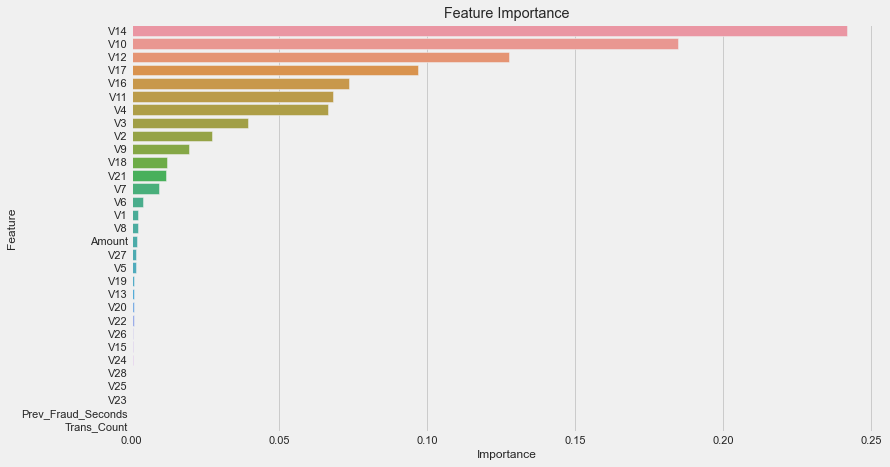

In [48]:
# Visualize the amount of contribution that each feature provides to the machine learning model. (Total contribution adds up to 1 which is basically 100%)

feature_imp = pd.DataFrame()
feature_imp['Feature'] = df.iloc[:, :-1].columns
feature_imp['Importance'] = rfc.feature_importances_

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

sns.barplot(x = 'Importance', y = 'Feature', data = feature_imp).set(title = 'Feature Importance')
plt.show()

> As we can see, there are some front runners there at the top, with these features having alot of influence for the model. However, surprisingly, both of the new engineered features did not really contribute much, so it will be removed along with a few of the other weak features.

In [49]:
# time to focus on the strong features

good_features = feature_imp.Feature.head(7).values.tolist()
good_features.append('Class')
good_features

['V14', 'V10', 'V12', 'V17', 'V16', 'V11', 'V4', 'Class']

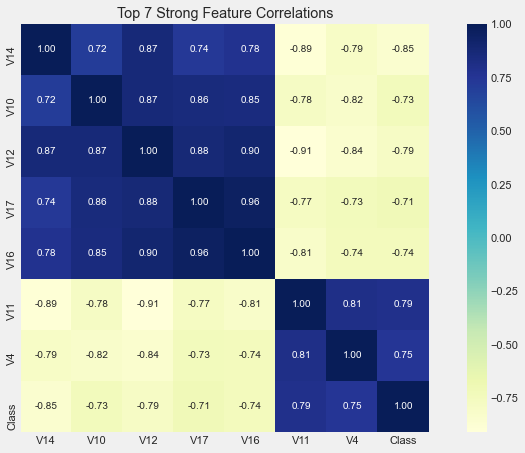

In [50]:
# now we can inspect the correlations for only the strong features
sns.heatmap(train_df[good_features].corr(), annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Top 7 Strong Feature Correlations')
plt.show()

> From the above heatmap, it can be seen that the top 7 strong features, are also highly correlated with each other (some positive and some negative). This means there is multicollinearity between them. Although that's the case, they are also highly correlated with the target label ('Class') and therefore we must keep them and use it to our strength in predicting the normal and fraud transactions.

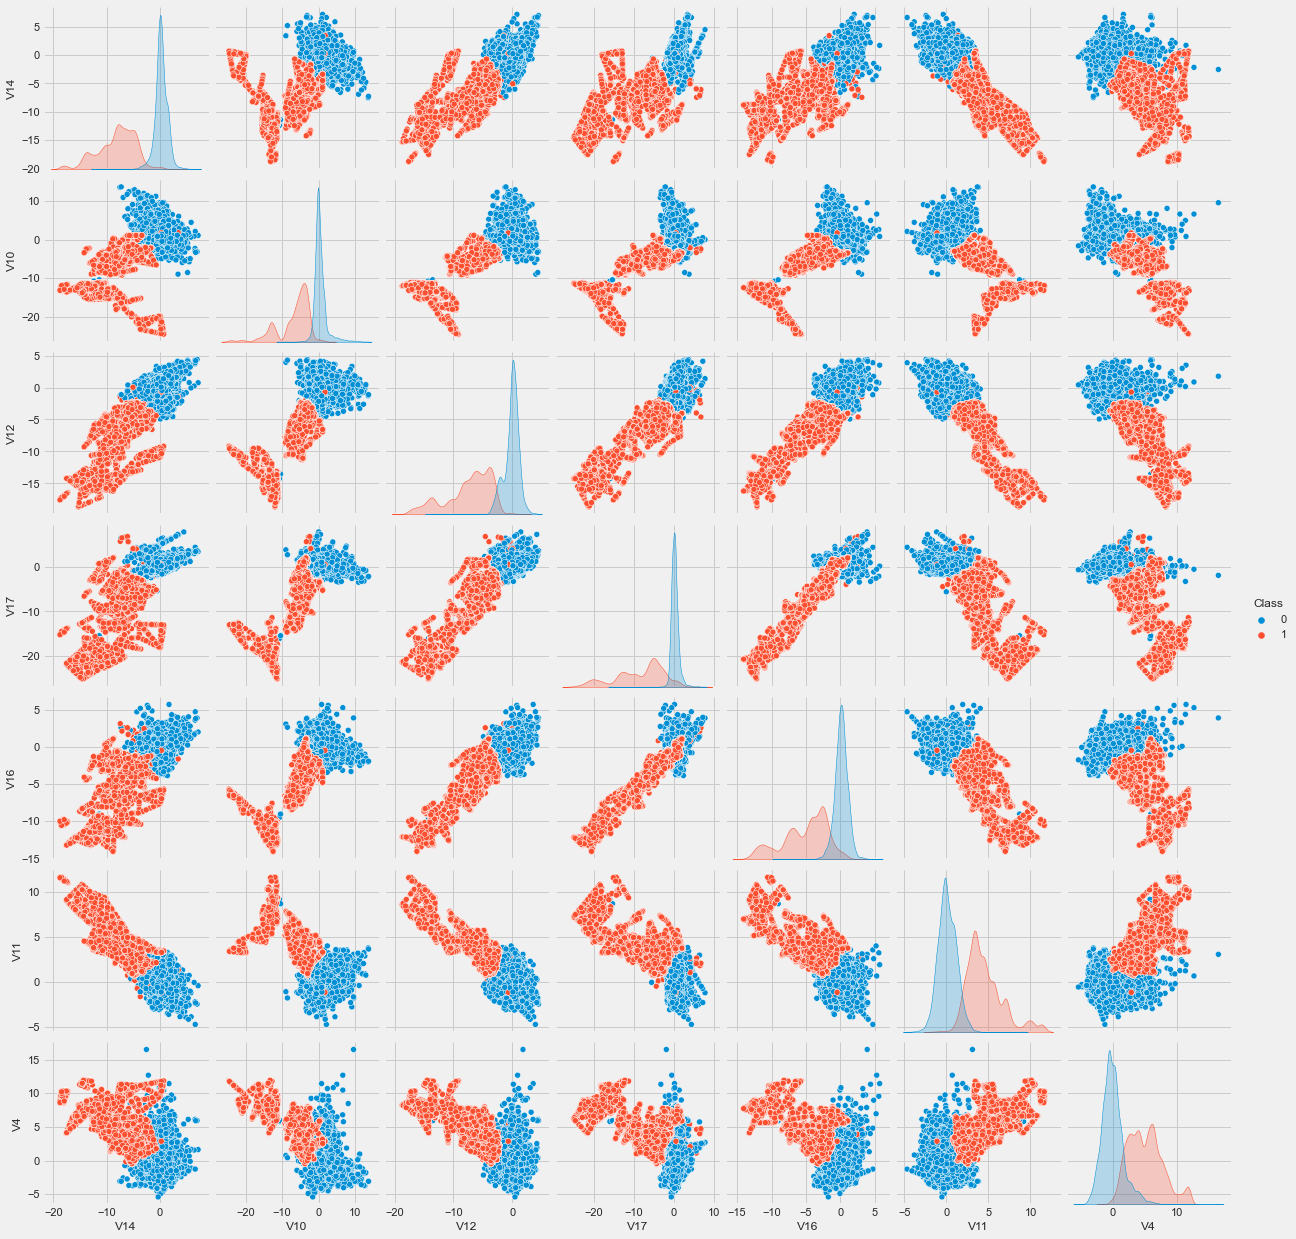

In [51]:
# view the distribution and correlation of those strong features by each class

sns.pairplot(train_df[good_features], hue = 'Class')
plt.show()

> From the above pairplot, we can see that all of these strong features have a very decent seperation for each of the classes (blue as normal and red as fraud), which means they will have a very big influence for the machine learning models. I can also spot some outliers, which must be dealt with as these features will have the most influence, and should not have alot of noise in the data.

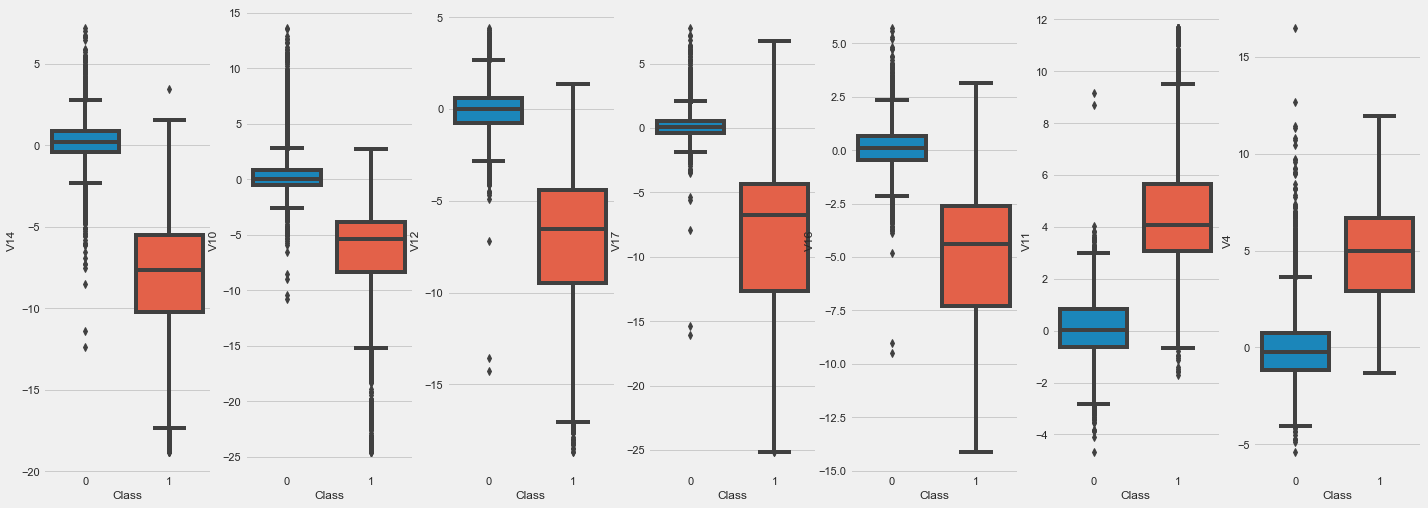

In [52]:
# inspecting the outliers for each of these strong features

good_features = feature_imp.Feature.head(7).values.tolist()

fix, ax = plt.subplots(1, 7, figsize = (22, 8), squeeze = True)
fig.tight_layout(pad = 15)

for i in range(len(good_features)):
    sns.boxplot(x = 'Class', y = good_features[i], data = train_df, ax = ax[i])

plt.show()

> Both normal and fraud transactions have outliers in most of these features, and I have decided that I will not be removing every single outlier, but extreme outliers only. This is to ensure that we dont lose too much information variability from the data.

In [53]:
# remove extreme outliers only, therefore values that are less than (q1 - 3*iqr) or more than (q3 + 3*iqr), instead of using 1.5*iqr

for i in range(len(good_features)):
    q1, q3 = train_df.loc[train_df.Class == 0][good_features[i]].quantile([0.25, 0.75])
    iqr = q3 - q1
    train_df.drop(train_df.loc[(train_df['Class'] == 0) & (train_df[good_features[i]] < (q1 - 3*iqr))].index, axis = 0, inplace = True)
    train_df.drop(train_df.loc[(train_df['Class'] == 0) & (train_df[good_features[i]] > (q3 + 3*iqr))].index, axis = 0, inplace = True)
    
    q1, q3 = train_df.loc[train_df.Class == 1][good_features[i]].quantile([0.25, 0.75])
    iqr = q3 - q1
    train_df.drop(train_df.loc[(train_df['Class'] == 1) & (train_df[good_features[i]] < (q1 - 3*iqr))].index, axis = 0, inplace = True)
    train_df.drop(train_df.loc[(train_df['Class'] == 1) & (train_df[good_features[i]] > (q3 + 3*iqr))].index, axis = 0, inplace = True)

In [54]:
# check shape after removing the extreme outliers

print('Train set shape: ',train_df.shape)
print('\nClass Label Portion:')
print(train_df.Class.value_counts())

Train set shape:  (20346, 32)

Class Label Portion:
1    10392
0     9954
Name: Class, dtype: int64


> Training set is still balanced and good to go.

In [55]:
# check on the most weak features

print('Weak Features List:')
print(feature_imp.Feature.tail(12).values)
print('\nTotal contribution of bottom 12 features (weak) to the model: ', round(feature_imp.Importance.tail(12).sum(), 4))
print('\nTotal contribution of remaining features to the model: ', round(feature_imp.Importance.head(19).sum(), 4))

Weak Features List:
['V19' 'V13' 'V20' 'V22' 'V26' 'V15' 'V24' 'V28' 'V25' 'V23'
 'Prev_Fraud_Seconds' 'Trans_Count']

Total contribution of bottom 12 features (weak) to the model:  0.0074

Total contribution of remaining features to the model:  0.9926


> The 12 most weakest features only contribute 0.74% to the prediction of our target label, while the remaining features contribute 99.26% to the prediction. Therefore, the bottom 12 weakest features will be removed as they are redundant and have no major impact at all.

In [56]:
# drop the 12 weakest features from train set

train_df.drop(columns = feature_imp.Feature.tail(12).values, axis = 1, inplace = True)
train_df.shape

(20346, 20)

In [57]:
# drop the 12 weakest features from test set as well

test_portion.drop(columns = feature_imp.Feature.tail(12).values, axis = 1, inplace = True)
test_portion.shape

(190, 20)

In [58]:
# re-shuffle the data again and then seperate independent variables from the target class label for each train and test set

train_df = train_df.sample(frac = 1, random_state = rand_val).reset_index(drop = True)
test_portion = test_portion.sample(frac = 1, random_state = rand_val).reset_index(drop = True)

X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1:].values

X_test = test_portion.iloc[:,:-1].values
y_test = test_portion.iloc[:,-1:].values

<a id = 'section7'></a>

<h1 style = 'font-size: 25px; color: DodgerBlue'>7. Optimistic Weighted Machine Learning (OW-ML) & Hyperparameter Tuning</h1>

<b>The goal of this project, is to maximize recall (as we want to detect as many fraudulent transactions as possible), and at the same time, it is okay to have a small precision trade-off to compensate for that (as having a few missclassified normal transactions would only mean that a few normal users would need to provide some additional authentication to prove that the transaction is legit in a real case scenario).</b>

<b>That is why a standard ML approach is not taken here. Instead, weights are added to each class (Normal & Fraud) to make the ML models more optimistic and having a better ability to predict the positive class (Frauds) while still doing well in detecting the negative class (Normal) as well. Furtheremore, the hyperparameter tuning is done with stratified cross-validation and the scoring is measured using the F-beta score (with beta = 2.0), so that recall has a larger influence on the score, as we want to get the parameters that provide the best recall, while having a small precision trade-off.</b>

A total of 5 models will be trained and evaluated.
1. Random Forest
2. XGBoost Classifier
3. Logistic Regression
4. Support Vector Machine
5. Artificial Neural Network


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_roc_curve


# create function for finding optimal hyperparameters through grid search cv, and f-beta score for the scoring
def find_optimal_params(model, param_grid):
    fbeta = make_scorer(fbeta_score, beta = 2.0)
    gs_cv = GridSearchCV(model, param_grid, scoring = fbeta, n_jobs= -1, verbose = 1, cv = 3)
    gs_cv.fit(X_train, y_train.ravel())
    optimal_param = gs_cv.best_params_
    best_model = gs_cv.best_estimator_
    return best_model, optimal_param


# create function for evaluating the sklearn classification models
def evaluate_classification_model(title, model, prediction_results):
    print(f'\n\n--------------- {title} RESULT ---------------\n')
    print('F-beta Score: ', round(fbeta_score(y_test, prediction_results, beta = 2.0), 3))
    print('Accuracy Score: ', round(model.score(X_test, y_test.ravel()) * 100, 3), '%')
    sns.set(style = 'dark', rc = {'figure.figsize': (4, 4)})
    plot_confusion_matrix(model, X_test, y_test, cmap = 'YlGnBu')
    plt.title('Confusion Matrix')
    plt.show()
    class_names = ['Normal', 'Fraud']
    print('\n', classification_report(y_test, prediction_results, target_names = class_names))


# create function for evaluating the tensorflow.keras neural network model
def evaluate_neural_network(title, prediction_results):    
    cm = confusion_matrix(y_test, prediction_results)
    print(f'\n\n--------------- {title} RESULT ---------------\n')
    print('F-beta Score: ', round(fbeta_score(y_test, prediction_results, beta = 2.0), 3))
    print('Accuracy Score: ', round(((cm[0][0] + cm[1][1]) / cm.sum()) * 100, 3), '%\n')
    sns.set(style = 'dark', rc = {'figure.figsize': (4, 4)})
    sns.heatmap(cm, annot = True, annot_kws = {'size': 10, 'horizontalalignment': 'center'}, square = True, cmap = 'YlGnBu')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    class_names = ['Normal', 'Fraud']
    print('\n', classification_report(y_test, prediction_results, target_names = class_names))
    

In [60]:
# Finding optimal hyperparameters for Random Forest

rfc = RandomForestClassifier(random_state = rand_val, n_jobs = -1, class_weight = {0: 0.03, 1: 0.97})

rfc_param_grid = {
    'n_estimators': np.arange(45, 80, 5).astype(int),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(18, 30, 2).astype(int)),
    'max_leaf_nodes': [None],
    'min_samples_split': np.arange(2, 8).astype(int)
}

rfc_model, rfc_best_params = find_optimal_params(rfc, rfc_param_grid)

print('\nRandom Forest - Optimal hyperparameters:')
rfc_best_params

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1764 out of 1764 | elapsed:  4.6min finished



Random Forest - Optimal hyperparameters:


{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_split': 5,
 'n_estimators': 75}

In [61]:
from sklearn.linear_model import LogisticRegression

# Finding optimal hyperparameters for Logistic Regression

lr = LogisticRegression(random_state = rand_val, class_weight = {0: 0.025, 1: 0.975})

lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.25, 0.5, 1, 1.5, 3, 5],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [10000],
}

lr_model, lr_best_params = find_optimal_params(lr, lr_param_grid)

print('\nLogistic Regression - Optimal hyperparameters:')
lr_best_params

Fitting 3 folds for each of 105 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   46.3s finished



Logistic Regression - Optimal hyperparameters:


{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}

In [62]:
from xgboost import XGBClassifier

#Finding optimal hyperparameters for XGBoost

xgb = XGBClassifier(booster = 'gbtree', random_state = rand_val, verbosity = 1, n_jobs = 16, use_label_encoder = False, scale_pos_weight = 100000)

xgb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'gamma': [0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5],
    'max_depth': np.arange(6, 9).astype(int),
    'n_estimators': np.arange(40, 70, 5).astype(int),

}

xgb_model, xgb_best_params = find_optimal_params(xgb, xgb_param_grid)

print('\nRandom Forest - Optimal hyperparameters:')
xgb_best_params

Fitting 3 folds for each of 630 candidates, totalling 1890 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1890 out of 1890 | elapsed:  7.7min finished


[19:27:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Random Forest - Optimal hyperparameters:


{'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 65}

In [63]:
from sklearn.svm import SVC

# Finding optimal hyperparameters for SVM

svm = SVC(random_state = rand_val, class_weight = {0: 0.03, 1: 0.97})

svm_param_grid = {
    'C': np.arange(1, 5).astype(int),
    'kernel': ['poly'],
    'degree': np.arange(5, 13).astype(int),
    'gamma': ['scale', 'auto'],
    'coef0': np.arange(1, 5).astype(int),
    'class_weight': [{0: 0.03, 1: 0.97}, {0: 0.04, 1: 0.96}]
}

svm_model, svm_best_params = find_optimal_params(svm, svm_param_grid)

print('\nSupport Vector Machine - Optimal hyperparameters:')
svm_best_params

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed:  3.7min finished



Support Vector Machine - Optimal hyperparameters:


{'C': 1,
 'class_weight': {0: 0.04, 1: 0.96},
 'coef0': 1,
 'degree': 9,
 'gamma': 'scale',
 'kernel': 'poly'}

In [64]:
# train the models and predict

rfc_model.fit(X_train, y_train.ravel())
rfc_results = rfc_model.predict(X_test)

lr_model.fit(X_train, y_train.ravel())
lr_results = lr_model.predict(X_test)

xgb_model.fit(X_train, y_train.ravel())
xgb_results = xgb_model.predict(X_test)

svm_model.fit(X_train, y_train.ravel())
svm_results = svm_model.predict(X_test)

[19:31:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.metrics import RecallAtPrecision

tf.random.set_seed(rand_val)

# initialize the ANN model, having two hidden layers with relu activation and output layer with sigmoid
ann_model = Sequential([
    Dense(units = 6, input_shape = (19,), activation = 'relu'),
    Dense(units = 4, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile and train the ANN model
# Use 'adam' optimizer and 'binary_crossentropy' for the loss function
# 'RecallAtPrecision' metric used for scoring, and the outcome is similar to the F-beta scoring method

ann_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = [RecallAtPrecision(0.90)])
ann_model.fit(x = X_train, y = y_train, batch_size = 50, epochs = 30, verbose = 2, class_weight = {0: 0.05, 1: 0.95})

Epoch 1/30
407/407 - 0s - loss: 0.6082 - recall_at_precision: 2.8868e-04
Epoch 2/30
407/407 - 0s - loss: 0.0775 - recall_at_precision: 0.8060
Epoch 3/30
407/407 - 0s - loss: 0.0223 - recall_at_precision: 0.9936
Epoch 4/30
407/407 - 0s - loss: 0.0153 - recall_at_precision: 0.9950
Epoch 5/30
407/407 - 0s - loss: 0.0112 - recall_at_precision: 0.9969
Epoch 6/30
407/407 - 0s - loss: 0.0093 - recall_at_precision: 0.9972
Epoch 7/30
407/407 - 0s - loss: 0.0083 - recall_at_precision: 0.9973
Epoch 8/30
407/407 - 0s - loss: 0.0076 - recall_at_precision: 0.9977
Epoch 9/30
407/407 - 0s - loss: 0.0070 - recall_at_precision: 0.9980
Epoch 10/30
407/407 - 0s - loss: 0.0066 - recall_at_precision: 0.9982
Epoch 11/30
407/407 - 0s - loss: 0.0063 - recall_at_precision: 0.9983
Epoch 12/30
407/407 - 0s - loss: 0.0061 - recall_at_precision: 0.9985
Epoch 13/30
407/407 - 0s - loss: 0.0059 - recall_at_precision: 0.9986
Epoch 14/30
407/407 - 0s - loss: 0.0057 - recall_at_precision: 0.9987
Epoch 15/30
407/407 - 0s 

In [67]:
# predict using ANN model
# also store the fpr, tpr and auc_score for evaluation

ann_prob = ann_model.predict(x = X_test, batch_size = 50, verbose = 0)
ann_results = (ann_prob >= 0.5).astype("int32")

ann_fpr, ann_tpr, ann_thresholds = roc_curve(y_test, ann_prob)
ann_auc_score = roc_auc_score(y_test, ann_prob)

<a id = 'section8'></a>

<h1 style = 'font-size: 25px; color: MediumSeaGreen'>8. Classification Model Evaluations</h1>

When evaluating classification models, it's important to use multiple metrics apart from accuracy to ensure that the model is actually effective in differentitating between the two classes.

Evaluation Methods (for this scenario):
1. <b>F-beta Score (Very important as we are placing more value to recall)</b>
2. <b>Precision & Recall (Very important)</b>
3. Accuracy Score & F-1 Score (Can still be used as data is now balanced, but is not very helpful)
4. Confusion Matrix (important)
5. AUC-ROC Score (important as well)



--------------- ARTIFICIAL NEURAL NETWORK RESULT ---------------

F-beta Score:  0.919
Accuracy Score:  94.211 %



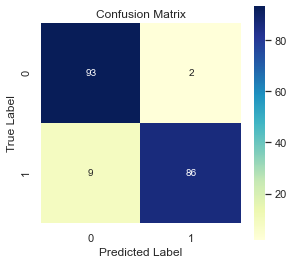


               precision    recall  f1-score   support

      Normal       0.91      0.98      0.94        95
       Fraud       0.98      0.91      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



--------------- RANDOM FOREST RESULT ---------------

F-beta Score:  0.896
Accuracy Score:  93.684 %


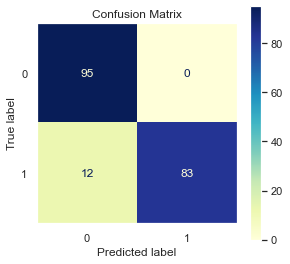


               precision    recall  f1-score   support

      Normal       0.89      1.00      0.94        95
       Fraud       1.00      0.87      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



--------------- LOGISTIC REGRESSION RESULT ---------------

F-beta Score:  0.932
Accuracy Score:  94.211 %


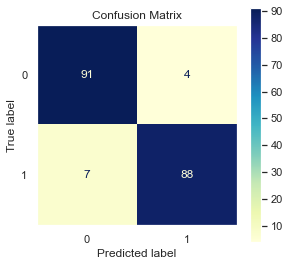


               precision    recall  f1-score   support

      Normal       0.93      0.96      0.94        95
       Fraud       0.96      0.93      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



--------------- XGBoost Classifier RESULT ---------------

F-beta Score:  0.923
Accuracy Score:  95.263 %


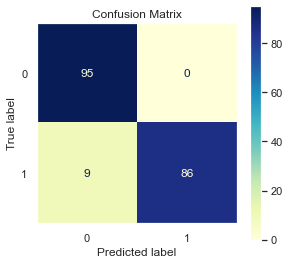


               precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        95
       Fraud       1.00      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



--------------- SUPPORT VECTOR MACHINE RESULT ---------------

F-beta Score:  0.923
Accuracy Score:  95.263 %


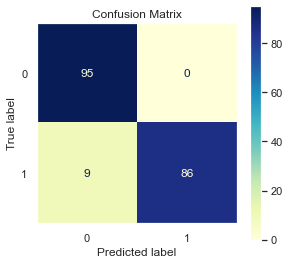


               precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        95
       Fraud       1.00      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



In [68]:
# evaluate all 5 models

evaluate_neural_network('ARTIFICIAL NEURAL NETWORK', ann_results)
evaluate_classification_model('RANDOM FOREST', rfc_model, rfc_results)
evaluate_classification_model('LOGISTIC REGRESSION', lr_model, lr_results)
evaluate_classification_model('XGBoost Classifier', xgb_model, xgb_results)
evaluate_classification_model('SUPPORT VECTOR MACHINE', svm_model, svm_results)

### <b>Evaluation</b>
<i>Note: Positives (1) are fraud, and Negatives (0) are normal transactions</i>

- All the five models did very well in terms of overall performance.

- As a company, the aim would be to maximize both true positives and negatives, but at the same time we are willing to have a few false positives for a trade off to reduce false negatives. This is because it's better to have a few false alarms for normal transactions (user would need to provide some additional authentication to prove it's them) while we want to avoid having many situations where the model falsely predicts that the transaction is normal and we completely miss out on the chance to stop the fraud from happening. In that case we want to have as much recall for the Fraud class while having a bit less precision (trade-off) if necessary.

- The F-beta score, provides a very good indication of how well the model did in terms of recall and precision (with recall having more value). All the models had an f-beta score between 0.91 - 0.93, except for Random Forest, and it can be seen from all the models, only random forest didn't do too well in terms of prioritizing the fraud class.

- In terms of recall, some models performed very well, specifically the Logistic Regression, and after that, the XGBoost, SMV and ANN. Random Forest struggled a bit here.

- In terms of precision, all 5 models did very well without any issues.

- <b>If I were to choose a winner here, I would definitely go with the Logistic Regression Classifier, as it did very well to prioritize the fraud class, having the best recall (0.93), and at the same time, had great precision (0.96), even after a small trade-off. Therefore, it had the best F-beta score at 0.932. Apart from that, we also have XGBoost, SVM and ANN, that did pretty good as well.</b>

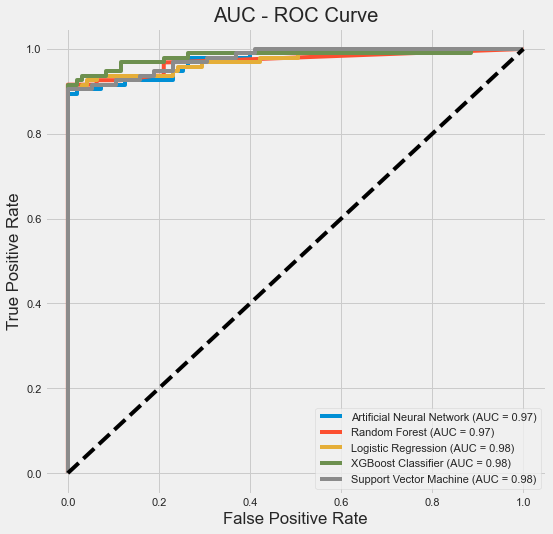

In [69]:
# evaluate AUC-ROC curve for all 5 models

sns.set(rc = {'figure.figsize': (8, 8)})
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1)

plt.plot(ann_fpr, ann_tpr, label = f'Artificial Neural Network (AUC = {round(ann_auc_score, 2)})')
plot_roc_curve(rfc_model, X_test, y_test, ax = ax, name = 'Random Forest')
plot_roc_curve(lr_model, X_test, y_test, ax = ax, name = 'Logistic Regression')
plot_roc_curve(xgb_model, X_test, y_test, ax = ax, name = 'XGBoost Classifier')
plot_roc_curve(svm_model, X_test, y_test, ax = ax, name = 'Support Vector Machine')
plt.plot(np.arange(0, 1.01, 0.01), np.arange(0, 1.01, 0.01), linestyle = '--', color = 'black')
plt.title('AUC - ROC Curve')
plt.show()

- All of the ROC curves for the five classification models have an area between 0.97 - 0.98, which again indicates that all the 5 models performed really great, and was able to distinguish the two classes very well.
- A high True Positive Rate (TPR) here is indicating that the model is able to detect the fraud cases well, while a low False Positive Rate (FPR) indicates that the model is able to correctly classify the normal transactions very well too, and having only a few missclassified cases.


<a id = 'section9'></a>

<h1 style = 'font-size: 25px; color: slateblue'>9. Final Thoughts & Summary</h1>

I think this project went very well, with proper structure and I was able to satisfy the main agenda that I had from when I started. Given the approach that was taken here, starting with the cleaning and dealing with the imbalanced issue, carrying out effective undersampling and oversampling as a hybrid and then focusing on the feature importance, and dealing with outliers and noise from the start. Next the models were carefully trained with optimal hyperparameters through a Grid Search CV, adding weights and scoring them through F-beta to prioritize recall, and this helped to further boost the performance of the models. Lastly, by having a thorough evaluation with multiple metrics, it can be concluded that using this approach has proven to be useful and effective, which could definitely help organizations to deal with fraudsters in a more efficient and practical manner.

<i>Note: For those wondering why I did not add k-fold cross-validation for one of the final evaluation methods, it is due to the nature of the dataset starting as imbalanced, thus the train-test split needs to be done much earlier on (to avoid bias), even before the scaling, composite undersampling & oversampling, feature importance & selections, as well as hyper-parameter tuning. Therefore most of the code would have to be re-run for each fold, and perhaps that is something that could be added in the future. Although, while experimenting, I have tried with different seeds, resulting in different train-test sets, and they performed generally well.</i>